# Dimension Reduction

### 0. Import libraries and modules

In [2]:
import sklearn
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
np.random.seed(42) 

### 1. Load winequality-red.csv and winequality-white.csv files using pandas

In [3]:
#load the dataset
red_w = pd.read_csv("winequality-red_0225.csv", sep= ";")
white_w = pd.read_csv("winequality-white_0225.csv", sep = ";")

### 2. Compute principal components of red wines

In [14]:
# Drop the 'quality' column from the red wine dataset to only focus on the numerical features
red_d = red_w.drop(columns=["quality"])

# Standardize the data using StandardScaler to scale all features to have mean 0 and variance 1
scaler = StandardScaler()
red_ws = scaler.fit_transform(red_d)  # Apply scaling to the data

# Perform PCA (Principal Component Analysis) on the scaled red wine data
pca = PCA()
w_pca = pca.fit_transform(red_ws)  # Fit the PCA model and transform the data to a lower-dimensional space

# Extract the loadings (components) from the PCA model
loadings = pca.components_
# Convert the PCA components (loadings) into a DataFrame for easier interpretation
# The rows represent the principal components (PC1, PC2, etc.), and the columns represent 
#the original features of the red wine dataset
loadings_df = pd.DataFrame(loadings, columns=red_d.columns, 
                           index=[f"PC{i+1}" for i in range(len(loadings))]) 

Explained Variance per Principal Component:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.281739             0.281739
1                  PC2                  0.175083             0.456822
2                  PC3                  0.140958             0.597781
3                  PC4                  0.110294             0.708074
4                  PC5                  0.087208             0.795283
5                  PC6                  0.059964             0.855247
6                  PC7                  0.053072             0.908319
7                  PC8                  0.038451             0.946770
8                  PC9                  0.031331             0.978101
9                 PC10                  0.016485             0.994586
10                PC11                  0.005414             1.000000

PCA Loadings (Feature Contributions to PCs):
      fixed acidity  volatile acidity  citric acid  residual sugar  ch

### 3. Which variables contribute the most to the first and the second principal components?

In [4]:
# Extract absolute loadings and sort for PC1 and PC2
pc1_contributors = loadings_df.iloc[0].abs().sort_values(ascending=False)
pc2_contributors = loadings_df.iloc[1].abs().sort_values(ascending=False)

print("Most contribute variable from PCA1 is fixed acidity")
print("Most contribute variable from PCA2 is total sulfur dioxide")
print(pc1_contributors)
print(pc2_contributors)

Most contribute variable from PCA1 is fixed acidity
Most contribute variable from PCA2 is total sulfur dioxide
fixed acidity           0.489314
citric acid             0.463632
pH                      0.438520
density                 0.395353
sulphates               0.242921
volatile acidity        0.238584
chlorides               0.212247
residual sugar          0.146107
alcohol                 0.113232
free sulfur dioxide     0.036158
total sulfur dioxide    0.023575
Name: PC1, dtype: float64
total sulfur dioxide    0.569487
free sulfur dioxide     0.513567
alcohol                 0.386181
volatile acidity        0.274930
residual sugar          0.272080
density                 0.233575
citric acid             0.151791
chlorides               0.148052
fixed acidity           0.110503
sulphates               0.037554
pH                      0.006711
Name: PC2, dtype: float64


### 4. Select the number of PCs that can explain at least 95% of variabilities.

In [5]:
# Calculate the cumulative sum of the explained variance ratio for each principal component
c_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components needed to explain at least 95% of the variance
# np.argmax finds the index of the first value in c_variance that is greater than or equal to 0.95
# Adding 1 because the index is 0-based, while the number of components is 1-based.
n_pca = np.argmax(c_variance >= 0.95) + 1

#print the result
n_pca

9

### 5. Merge the red wine and white wine datasets and compute principal components. Compare the first and the second principal components with those of Q2.

In [6]:
# Concatenate the red and white wine datasets vertically, creating a single dataset with all observations
# ignore_index=True ensures the index is reset across both datasets
t_wine = pd.concat([red_w, white_w], ignore_index=True)

# Drop the 'quality' column as we are only interested in the features for PCA analysis
total_d = t_wine.drop(columns=["quality"])

# Standardize the data using StandardScaler, so that each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
total_ws = scaler.fit_transform(total_d)

# Perform PCA (Principal Component Analysis) on the standardized data
pca = PCA()
toal_pca = pca.fit_transform(total_ws)  # Fit and transform the data using PCA

# Extract the loadings (components) from the PCA model
t_loadings = pca.components_

# Convert the PCA loadings (components) into a DataFrame for easier interpretation
# The rows represent the principal components (PC1, PC2, etc.), and the columns represent the original features
t_loadings_df = pd.DataFrame(t_loadings, columns=total_d.columns, index=[f"PC{i+1}" for i in range(len(t_loadings))])

print("----- t_loadings_df for PC1 and PC2 -----")
print(t_loadings_df.loc[['PC1', 'PC2']])

print("\n----- loadings_df for PC1 and PC2 -----")
print(loadings_df.loc[['PC1', 'PC2']])

----- t_loadings_df for PC1 and PC2 -----
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1      -0.238799         -0.380757     0.152388        0.345920  -0.290113   
PC2       0.336355          0.117550     0.183299        0.329914   0.315258   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1             0.430914              0.487418 -0.044937 -0.218686  -0.294135   
PC2             0.071933              0.087266  0.584037 -0.155869   0.191716   

      alcohol  
PC1 -0.106437  
PC2 -0.465058  

----- loadings_df for PC1 and PC2 -----
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.489314         -0.238584     0.463632        0.146107   0.212247   
PC2      -0.110503          0.274930    -0.151791        0.272080   0.148052   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1            -0.036158              0.023575  0.395353 -0.43

### 6. Draw classical MDS plots that represent variables of red wines and white wines in a two-dimensional space, respectively. Briefly compare variables of two types of wines.

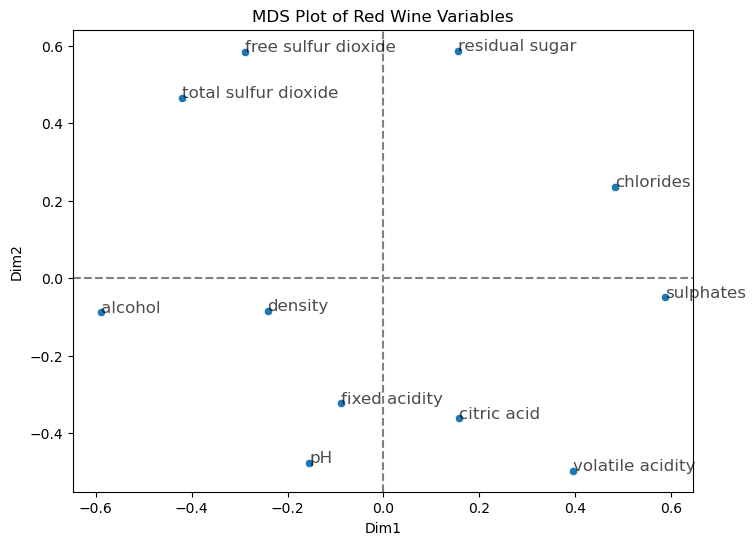

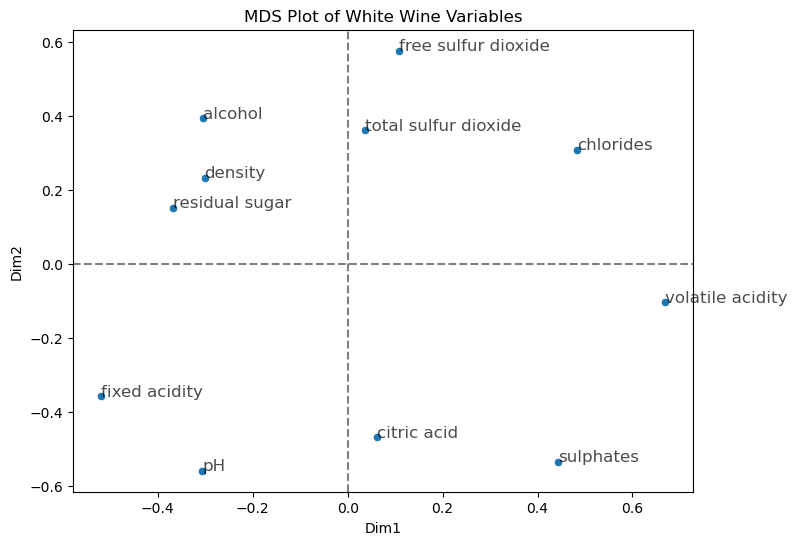

In [4]:
# Define a function for plotting MDS (Multidimensional Scaling) plots
def plot_mds(wine, title):
    # Calculate the correlation matrix and transform it into a dissimilarity (distance) matrix
    # We take the absolute correlation (similarity) and subtract from 1 to get dissimilarity (distance).
    distance_matrix = 1 - wine.corr().abs()

    # Apply MDS with 2 components and the precomputed dissimilarity matrix
    # The random_state is set for reproducibility
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    mds_coords = mds.fit_transform(distance_matrix)  # Fit the MDS model and get coordinates

    # Convert the 2D MDS coordinates to a DataFrame for easy visualization
    mds_df = pd.DataFrame(mds_coords, index=wine.columns, columns=["Dim1", "Dim2"])

    # Plot the results using seaborn's scatterplot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Dim1", y="Dim2", data=mds_df)  # Plot Dim1 vs Dim2

    # Annotate variable names on the plot
    # Loop through the variables and add text annotations on the MDS plot for each variable
    for i, txt in enumerate(mds_df.index):
        plt.annotate(txt, (mds_df.iloc[i, 0], mds_df.iloc[i, 1]), fontsize=12, alpha=0.7)  # Annotate at each (Dim1, Dim2)

    # Add horizontal and vertical lines at 0 to center the plot
    plt.axhline(0, color="gray", linestyle="--")
    plt.axvline(0, color="gray", linestyle="--")

    # Set the plot title
    plt.title(title)
    
    # Display the plot
    plt.show()


# Prepare the datasets by removing non-numeric columns
red_wine_numeric = red_w.drop(columns=["quality", "wine_type"], errors="ignore")
white_wine_numeric = white_w.drop(columns=["quality", "wine_type"], errors="ignore")

# Call the MDS plotting function for both red and white wine
plot_mds(red_wine_numeric, "MDS Plot of Red Wine Variables")
plot_mds(white_wine_numeric, "MDS Plot of White Wine Variables")

### 7. Randomly sample 200 wine observations from red and white datasets, respectively (400 wine observations in total, make sure to set the seed so that it can be replicable). Reduce the dimension of 400 wine observations from 12 to 2 using PCA. Create a plot that draws 400 red and white wine observations on the 2D space, where red and white wines are marked in a different color.

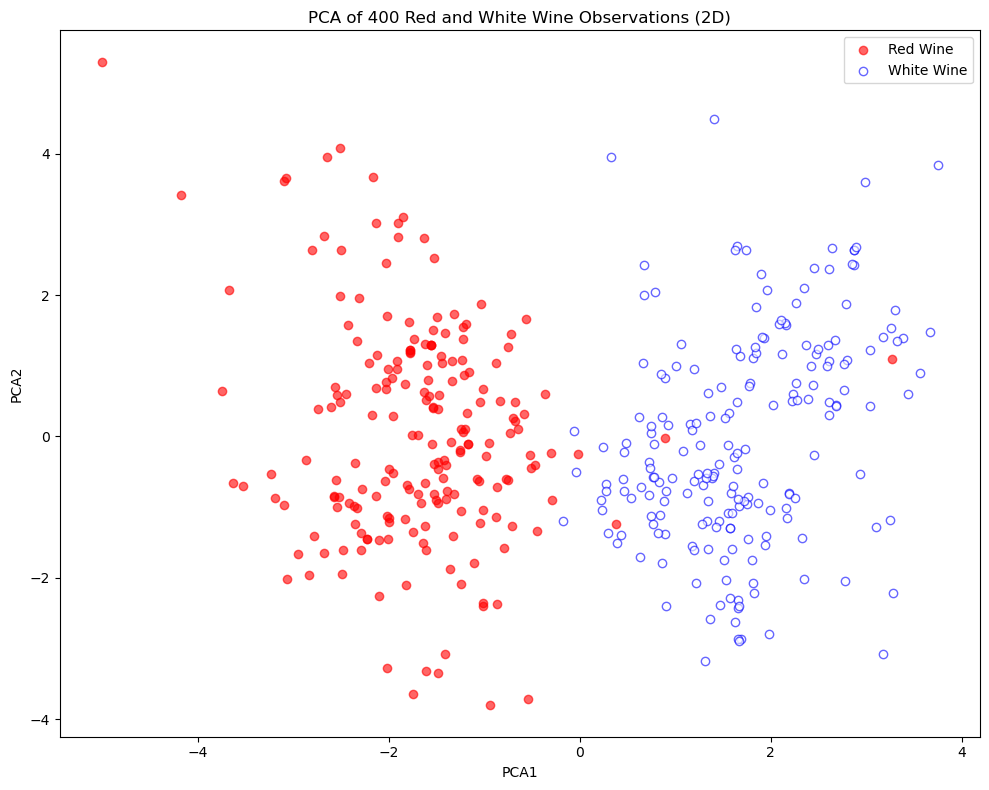

In [8]:
# Randomly sample 200 red wine observations and 200 white wine observations
red_sample = red_w.sample(n=200, random_state=42)
white_sample = white_w.sample(n=200, random_state=42)

# Combine the red and white wine datasets
combined_wine = pd.concat([red_sample, white_sample], ignore_index=True)

# Create a new column to distinguish between red and white wine
combined_wine['wine_type'] = ['Red'] * 200 + ['White'] * 200

# Drop the 'quality' column for PCA
combined_d = combined_wine.drop(columns=["quality", "wine_type"])

# Standardize the data
scaler = StandardScaler()
combined_ws = scaler.fit_transform(combined_d)

# Apply PCA to reduce dimensions from 12 to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_ws)

# Create a DataFrame for the 2D PCA result
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['wine_type'] = combined_wine['wine_type']  # Add wine type to the DataFrame

# Plot the 2D PCA result with different colors for red and white wine
plt.figure(figsize=(10, 8))
plt.scatter(pca_df[pca_df['wine_type'] == 'Red']['PCA1'], 
            pca_df[pca_df['wine_type'] == 'Red']['PCA2'], 
            color='red', alpha=0.6, label='Red Wine')

plt.scatter(pca_df[pca_df['wine_type'] == 'White']['PCA1'], 
            pca_df[pca_df['wine_type'] == 'White']['PCA2'], 
            color='white', edgecolor='blue', alpha=0.6, label='White Wine')

plt.title('PCA of 400 Red and White Wine Observations (2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.tight_layout()
plt.show()

### 8. Reduce the dimension of 400 wine observations from 12 to 2 using classical MDS. Create a plot that draws 400 red and white wine observations on the 2D space, where red and white wines are marked in a different color.

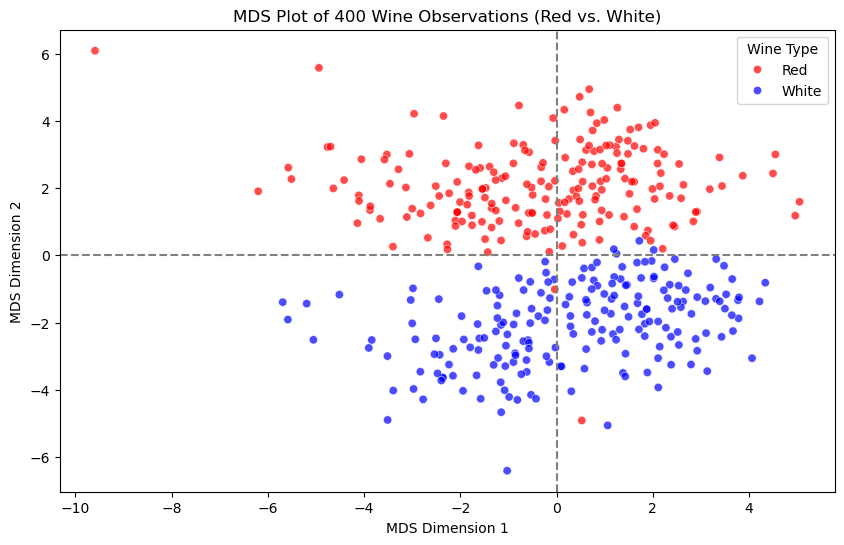

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample 200 observations from red and white wines
red_sample = red_w.sample(n=200, random_state=42)
white_sample = white_w.sample(n=200, random_state=42)

# Add a 'wine_type' column for differentiation
red_sample['wine_type'] = 'Red'
white_sample['wine_type'] = 'White'

# Merge sampled datasets
wine_sample = pd.concat([red_sample, white_sample], ignore_index=True)

# Drop non-numeric columns before applying MDS
wine_features = wine_sample.drop(columns=["quality", "wine_type"], errors="ignore")

# Standardize the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_features)

# Compute pairwise Euclidean distance matrix
distance_matrix = squareform(pdist(wine_scaled, metric='euclidean'))

# Apply Classical MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
wine_mds = mds.fit_transform(distance_matrix)

# Convert to DataFrame
mds_df = pd.DataFrame(wine_mds, columns=["Dim1", "Dim2"])
mds_df["wine_type"] = wine_sample["wine_type"].values  # Add wine type info

# Plot the MDS results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dim1", y="Dim2", hue="wine_type", data=mds_df, palette={"Red": "red", "White": "blue"}, alpha=0.7)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("MDS Plot of 400 Wine Observations (Red vs. White)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.legend(title="Wine Type")
plt.show()

### 9. Reduce the dimension of 400 wine observations from 12 to 2 using ISOMAP. Create a plot that draws 400 red and white wine observations on the 2D space, where red and white wines are marked in a different color.

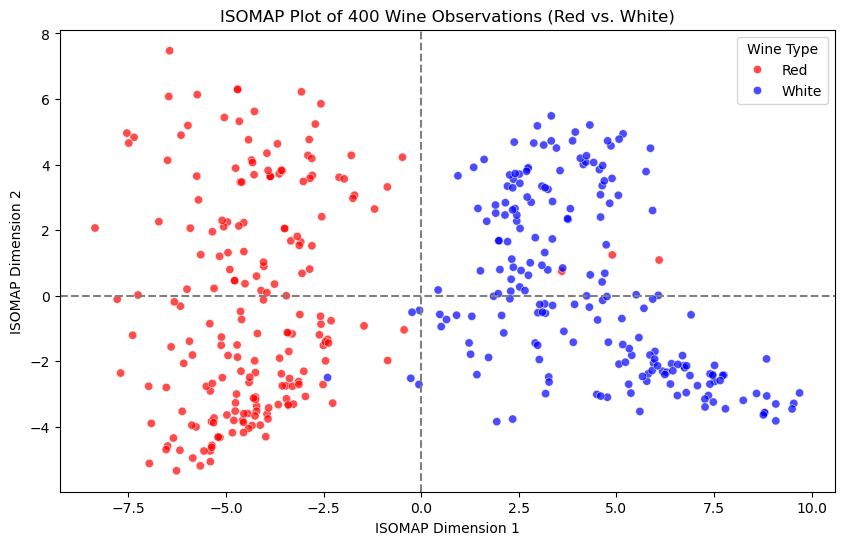

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample 200 observations from red and white wines
red_sample = red_w.sample(n=200, random_state=42)
white_sample = white_w.sample(n=200, random_state=42)

# Add a 'wine_type' column for differentiation
red_sample['wine_type'] = 'Red'
white_sample['wine_type'] = 'White'

# Merge sampled datasets
wine_sample = pd.concat([red_sample, white_sample], ignore_index=True)

# Drop non-numeric columns before applying ISOMAP
wine_features = wine_sample.drop(columns=["quality", "wine_type"], errors="ignore")

# Standardize the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_features)

# Apply ISOMAP to reduce dimensions from 12 to 2
isomap = Isomap(n_components=2)
wine_isomap = isomap.fit_transform(wine_scaled)

# Convert to DataFrame
isomap_df = pd.DataFrame(wine_isomap, columns=["Dim1", "Dim2"])
isomap_df["wine_type"] = wine_sample["wine_type"].values  # Add wine type info

# Plot the ISOMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dim1", y="Dim2", hue="wine_type", data=isomap_df, palette={"Red": "red", "White": "blue"}, alpha=0.7)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("ISOMAP Plot of 400 Wine Observations (Red vs. White)")
plt.xlabel("ISOMAP Dimension 1")
plt.ylabel("ISOMAP Dimension 2")
plt.legend(title="Wine Type")
plt.show()


### 10. Reduce the dimension of 400 wine observations from 12 to 2 using t-SNE. Create a plot that draws 400 red and white wine observations on the 2D space, where red and white wines are marked in a different color.

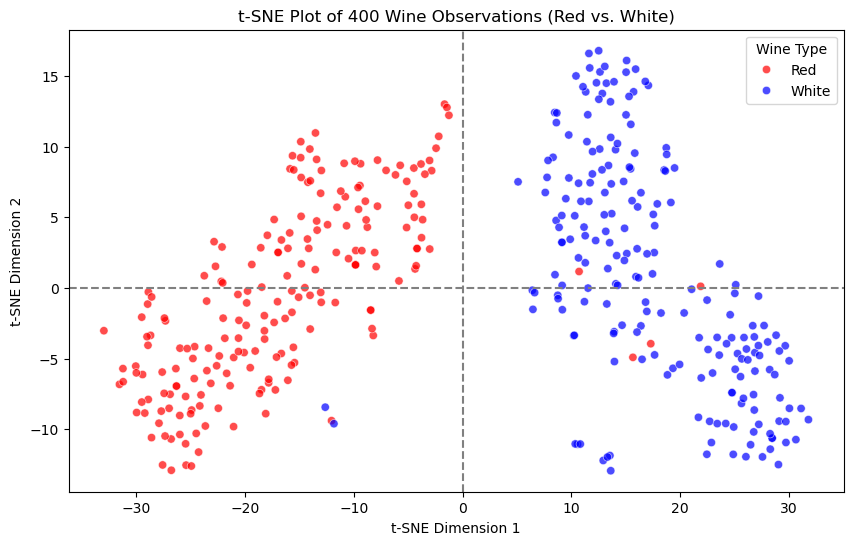

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample 200 observations from red and white wines
red_sample = red_w.sample(n=200, random_state=42)
white_sample = white_w.sample(n=200, random_state=42)

# Add a 'wine_type' column for differentiation
red_sample['wine_type'] = 'Red'
white_sample['wine_type'] = 'White'

# Merge sampled datasets
wine_sample = pd.concat([red_sample, white_sample], ignore_index=True)

# Drop non-numeric columns before applying t-SNE
wine_features = wine_sample.drop(columns=["quality", "wine_type"], errors="ignore")

# Standardize the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_features)

# Apply t-SNE to reduce dimensions from 12 to 2
tsne = TSNE(n_components=2, random_state=42)
wine_tsne = tsne.fit_transform(wine_scaled)

# Convert to DataFrame
tsne_df = pd.DataFrame(wine_tsne, columns=["Dim1", "Dim2"])
tsne_df["wine_type"] = wine_sample["wine_type"].values  # Add wine type info

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dim1", y="Dim2", hue="wine_type", data=tsne_df, palette={"Red": "red", "White": "blue"}, alpha=0.7)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("t-SNE Plot of 400 Wine Observations (Red vs. White)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Wine Type")
plt.show()